In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/home/sunail/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sunail/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/sunail/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data=pd.read_csv(r'/home/sunail/Downloads/Dummy Data HSS.xls')

In [3]:
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
len(data.columns)

5

In [5]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [7]:
# Calculate the average missing rate in the sales column.

missing_count=data['Sales'].isna().sum()
per_sales_missing=(missing_count/data['Sales'].sum())*100

In [8]:
per_sales_missing

0.0006827472571332673

In [9]:
# Subset the data to include rows where Sales is present.delete the missings

data['Sales']=data['Sales'].dropna()


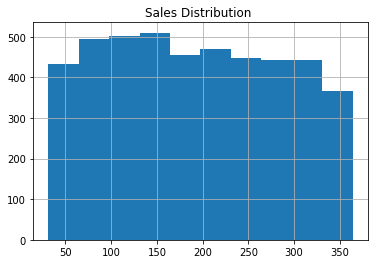

In [10]:
# Create a histogram of the Sales.

plt.hist(data.Sales)
# Add a title
plt.title("Sales Distribution ")
plt.grid()
plt.show()

# Model building

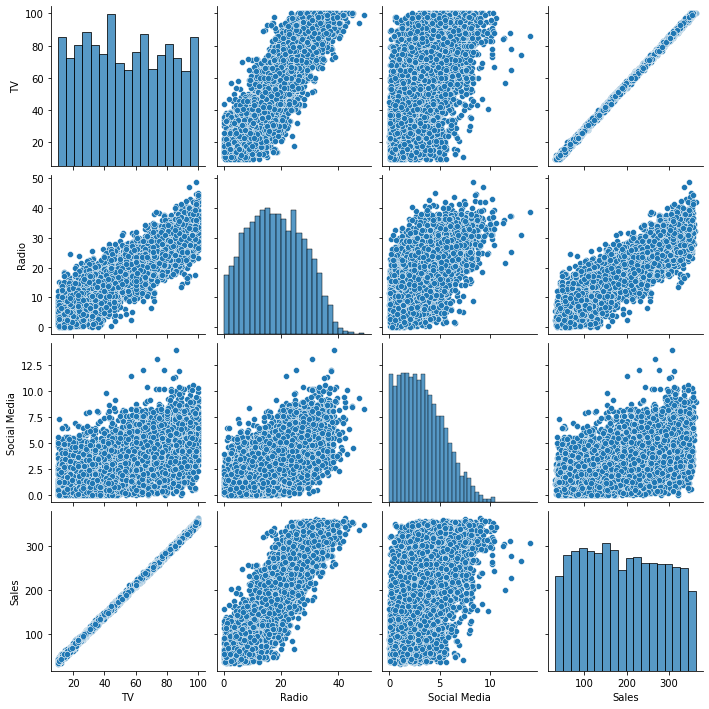

In [11]:
# Create a pairplot of the data.

sns.pairplot(data)

In [12]:

x=data.Sales
y=data.Radio

In [13]:

ols_formula = 'y ~ x'

# Create an OLS model.

ols_model=sm.formula.ols(formula=ols_formula,data=data)

# Fit the model.

res=ols_model.fit()

# Save the results summary.
summary=res.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 1.408e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:35:30   Log-Likelihood:                -13614.
No. Observations:                4562   AIC:                         2.723e+04
Df Residuals:                    4560   BIC:                         2.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7807      0.163      4.798      0.000       0.462       1.100
x              0.0903      0.001    118.652      0.000       0.089       0.092
==============================================================================
Omnibus:                        3.138   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.170
Skew:                           0.063   Prob(JB):                        0.205
Kurtosis:                       2.971   Cond. No.                         491.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

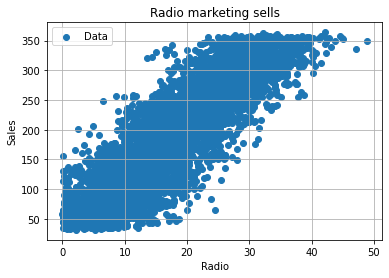

In [14]:
import matplotlib.pyplot as plt

plt.scatter(data.Radio, data.Sales)

plt.title("Radio marketing sells")
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.grid()
plt.legend(['Data'])  # Adding a legend to the plot
plt.show()


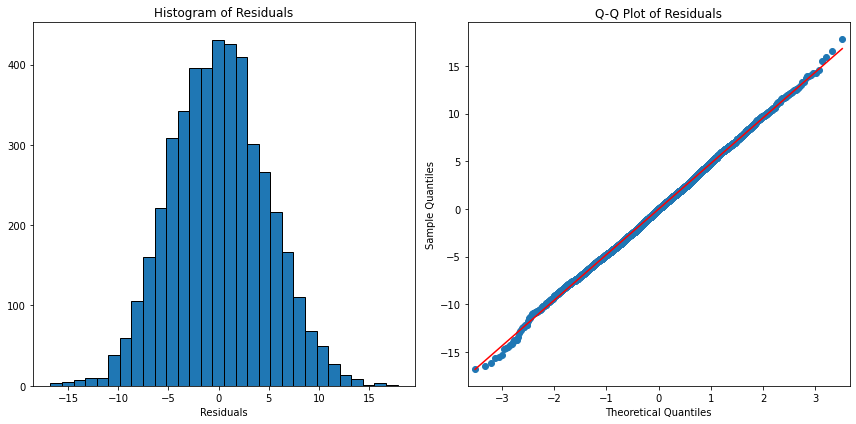

In [15]:
residuals = res.resid

# Create a 1x2 plot figure
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the residuals
axs[0].hist(residuals, bins=30, edgecolor='k')
axs[0].set_xlabel('Residuals')
axs[0].set_title('Histogram of Residuals')

# Create a Q-Q plot of the residuals
sm.qqplot(residuals, line='s', ax=axs[1])
axs[1].set_title('Q-Q Plot of Residuals')

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance
plt.tight_layout()

# Show the plot
plt.show()


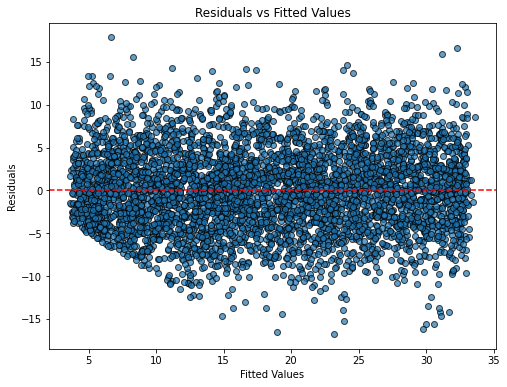

In [17]:

# Extract the fitted values
fitted_values = res.fittedvalues

# Create a scatterplot with the fitted values and the residuals
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, edgecolor='k', alpha=0.7)

# Set the x-axis label
plt.xlabel("Fitted Values")

# Set the y-axis label
plt.ylabel("Residuals")

# Set the title
plt.title('Residuals vs Fitted Values')

# Add a horizontal line at y = 0 to visualize the variance of residuals above and below 0
plt.axhline(y=0, color='red', linestyle='--')

# Show the plot
plt.show()
